In [2]:
import tensorflow as tf
import numpy as np

In [3]:
# 例子1

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.4 + 0.9

weight = tf.Variable(tf.random_uniform([1], -0.1, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = weight * x_data + biases

loss = tf.reduce_mean(tf.square(y - y_data))
# 误差传递方法是梯度下降法
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
# 始化所有之前定义的Variable
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in range(200):
    sess.run(train)
    if step % 20 == 0:
        print step, sess.run(weight), sess.run(biases)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [ 0.8605063] [ 0.92711782]
20 [ 0.49690402] [ 0.8437199]
40 [ 0.42823532] [ 0.88360143]
60 [ 0.40822706] [ 0.89522189]
80 [ 0.40239716] [ 0.89860773]
100 [ 0.40069851] [ 0.89959431]
120 [ 0.40020356] [ 0.89988178]
140 [ 0.40005937] [ 0.89996552]
160 [ 0.40001735] [ 0.8999899]
180 [ 0.40000507] [ 0.89999706]


In [4]:
# 例子2

matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2], [2]])

product = tf.matmul(matrix1, matrix2)

# method 1
sess = tf.Session()
result = sess.run(product)
print result
sess.close()

# method 2
with tf.Session() as sess:
    result = sess.run(product)
    print result

[[12]]
[[12]]


In [12]:
# Variable变量
import tensorflow as tf
state = tf.Variable(0, name='counter')

# 定义常量1
one = tf.constant(1)

# 定义加法步骤 (注: 此步并没有直接计算)
new_value = tf.add(state, one)

# 将 State 更新成 new_value
update = tf.assign(state, new_value)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print sess.run(state)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
1
2
3


In [13]:
# placeholder 传入值

# 预定义传入值
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.mul(input1, input2)

with tf.Session() as sess:
    # feed_dict传入实际值
    print sess.run(output, feed_dict={input1:[7.], input2: [2.]})

[ 14.]


## Activation Functions 激励函数 tf.nn

In [36]:
# 添加神经层 add_layer

def add_layer(inputs, in_size, out_size, activation_function=None):
    # 在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多
    # 所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。
    weights = tf.Variable(tf.random_normal([in_size, out_size]))
    # biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    wx_plus_b = tf.matmul(inputs, weights) + biases
    if activation_function is None:
        outputs = wx_plus_b
    else:
        outputs = activation_function(wx_plus_b)
    return outputs


# 建造神经网络
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]

# 方差0.05, x_data.shape数据形式
noise = np.random.normal(0, 0.05, x_data.shape)
# x_data 二次方
y_data = np.square(x_data) - 0.5 + noise

# 输入层 -> 隐藏层 -> 输出层

# 输入值
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# 定义隐藏层 1 输入层神经元数量， 输出层神经元数量，隐藏层神经元数量
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# 定义输出层
prediction = add_layer(l1, 10, 1, activation_function=None)

# 预测误差 二者差的平方和再求平均值
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

# 提供学习效率0.1，通常小于1， 最小化误差
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # 输出误差
        print sess.run(loss, feed_dict={xs: x_data, ys: y_data})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.295339
0.00607488
0.00473904
0.00429677
0.00412784
0.0040373
0.0039907
0.00395235
0.00391656
0.00388327
0.00385458
0.0038216
0.00378461
0.00374649
0.00369835
0.00366241
0.00363534
0.00361383
0.0035907
0.00357239


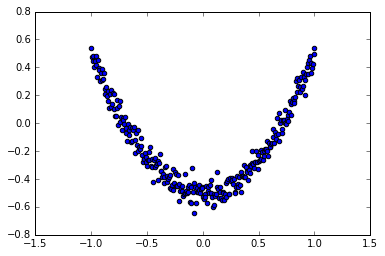

In [48]:
# 结果可视化
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
# plt.ion()
plt.show()

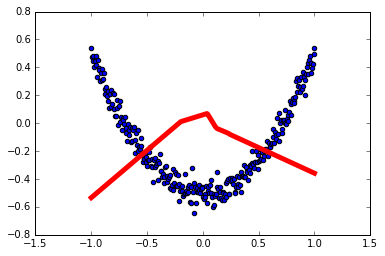

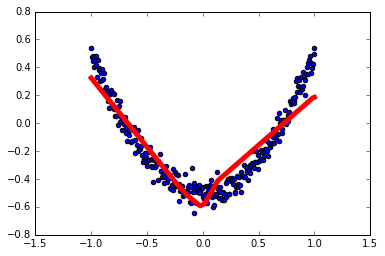

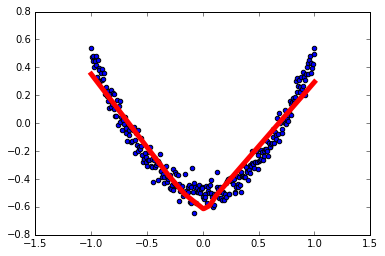

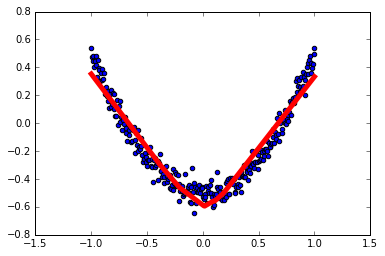

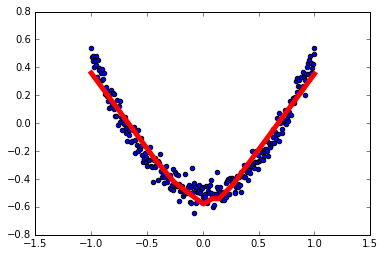

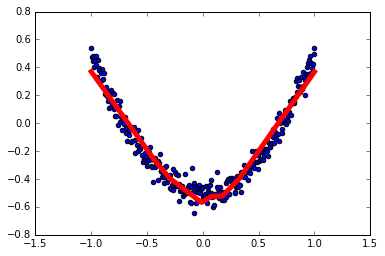

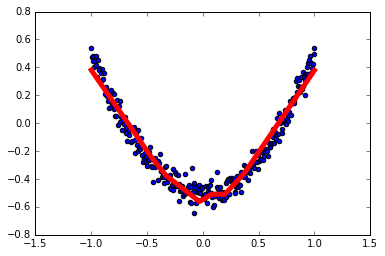

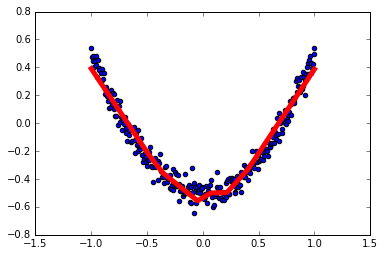

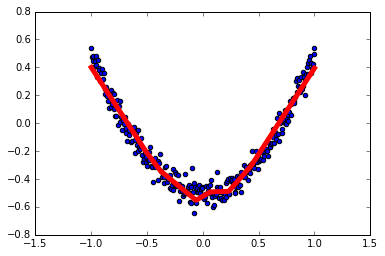

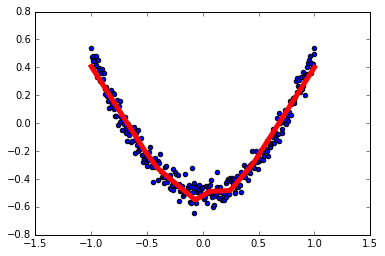

In [56]:
# 展示每一步的学习结果
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
        if i % 100 == 0:
            # 输出误差
            # print sess.run(loss, feed_dict={xs: x_data, ys: y_data})
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.scatter(x_data, y_data)
            try:
                # 去除原来的线
                ax.lines.remove(lines[0])
            except:
                pass
            # 画线
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            # 暂停一个时间
            plt.show()

In [ ]:
# Optimizer 优化器

# GradientDescentOptimizer最基本的一种